In [11]:

from matplotlib import pyplot as plt
%matplotlib inline
# 設定圖形大小; DPI越大圖越大
plt.rcParams["figure.dpi"] = 150

import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as smm
import statsmodels



In [10]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [119]:
result_or_107 = pd.read_csv('D:\python statistic\data\OR107 grades.csv')
result_or_107


,student-id,Section,Case Assignment 1 (1579),Case Assignment 2 (1843),Case Assignment 3 (2014),Pre-lecture problems for Lecture 2 (1631),Pre-lecture problems for Lecture 3 (1683),Pre-lecture problems for Lecture 4 (1731),Pre-lecture problems for Lecture 5 (1779),Pre-lecture Problems for Lecture 6 (1811),Pre-lecture Problems for Lecture 7 (1877),Pre-lecture Problems for Lecture 9 (1942),Pre-lecture Problems for Lecture 10 (1990),Pre-lecture Problems for Lecture 11 (2025),Homework 1 (1776),Homework 2 (1928),Homework 3 (2103),Final project proposal (2125),Final project (2126),Final Exam (2231)
0,Points Possible,NaN,100.0,100.0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,100.0,100.0,100.0,0.0,0.00,100.0
1,88,107-2 作業研究 Operations Research,72.0,NaN,NaN,NaN,9.0,NaN,8.0,10.0,NaN,NaN,NaN,NaN,82.0,NaN,NaN,NaN,NaN,NaN
2,89,107-2 作業研究 Operations Research,72.0,82.0,84.0,7.0,9.0,9.0,9.0,8.0,5.0,10.0,5.0,NaN,76.0,85.0,69.0,NaN,92.69,41.0
3,90,107-2 作業研究 Operations Research,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,91,107-2 作業研究 Operations Research,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,92,107-2 作業研究 Operations Research,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,93,107-2 作業研究 Operations Research and 107-2 作業研究 ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,94,107-2 作業研究 Operations Research,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,95,107-2 作業研究 Operations Research,51.0,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,96,107-2 作業研究 Operations Research,NaN,80.0,84.0,NaN,NaN,7.0,NaN,6.0,3.0,NaN,NaN,NaN,52.0,62.0,48.0,NaN,92.69,40.0


In [120]:
result_or_107_a = result_or_107.iloc[:,5:14]
result_or_107_a

,Pre-lecture problems for Lecture 2 (1631),Pre-lecture problems for Lecture 3 (1683),Pre-lecture problems for Lecture 4 (1731),Pre-lecture problems for Lecture 5 (1779),Pre-lecture Problems for Lecture 6 (1811),Pre-lecture Problems for Lecture 7 (1877),Pre-lecture Problems for Lecture 9 (1942),Pre-lecture Problems for Lecture 10 (1990),Pre-lecture Problems for Lecture 11 (2025)
0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
1,NaN,9.0,NaN,8.0,10.0,NaN,NaN,NaN,NaN
2,7.0,9.0,9.0,9.0,8.0,5.0,10.0,5.0,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,7.0,NaN,6.0,3.0,NaN,NaN,NaN


In [121]:
result_or_107_a = result_or_107_a.rename(columns={"Pre-lecture problems for Lecture 2 (1631)": "Lecture 2", "Pre-lecture problems for Lecture 3 (1683)": " Lecture 3" ,"Pre-lecture problems for Lecture 4 (1731)" : "Lecture 4" ,"Pre-lecture problems for Lecture 5 (1779)" : "Lecture 5" ,"Pre-lecture Problems for Lecture 6 (1811)" : "Lecture 6" , "Pre-lecture Problems for Lecture 7 (1877)" : "Lecture 7" , "Pre-lecture Problems for Lecture 9 (1942)" :"Lecture 9" , "Pre-lecture Problems for Lecture 10 (1990)" : " Lecture 10" ,  "Pre-lecture Problems for Lecture 11 (2025)" :"Lecture 11" } )
result_or_107_a

,Lecture 2,Lecture 3,Lecture 4,Lecture 5,Lecture 6,Lecture 7,Lecture 9,Lecture 10,Lecture 11
0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
1,NaN,9.0,NaN,8.0,10.0,NaN,NaN,NaN,NaN
2,7.0,9.0,9.0,9.0,8.0,5.0,10.0,5.0,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,7.0,NaN,6.0,3.0,NaN,NaN,NaN


In [123]:
result_or_107_a = result_or_107_a.fillna(0)

#### OR 107 weekly result (boxplot)

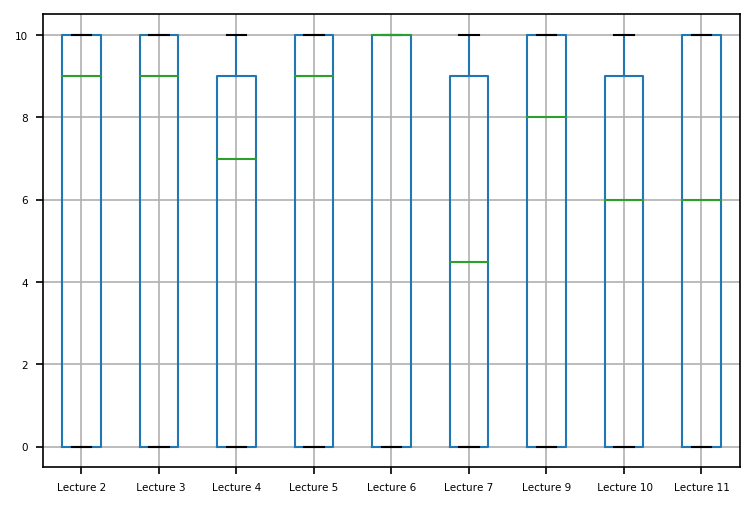

In [124]:
result_or_107_a.boxplot(fontsize = 5)
plt.show()

In [114]:
result_or_108 = result_or_107 = pd.read_csv('D:\python statistic\data\OR108 grades.csv')
result_or_108

,student_id,Section,Homework 1 (5323),Homework 2 (5324),Lecture problems for Lecture 2 (6960),Lecture problems for Lecture 3 (7183),Lecture problems for Lecture 4 (8211),Lecture problems for Lecture 5 (9672),Lecture problems for Lecture 6 (10335),Lecture problems for Lecture 7 (10924),Lecture problems for Lecture 8 (11901),Lecture problems for Lecture 9 (12376),Case Assignment 1 (6701),Case Assignment 2 (9742),Final project Final Points,Exams Final Points
0,Points Possible,NaN,100.0,100.0,10.0,10.0,10.0,10.0,10.0,10,10,10,100.00,100.0,(read only),(read only)
1,8,作業研究 Operations Research,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN,NaN,0,0
2,9,作業研究 Operations Research,58.0,NaN,10.0,6.0,9.0,10.0,10.0,10,5,10,63.50,NaN,0,0
3,10,作業研究 Operations Research,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN,96.0,0,0
4,11,作業研究 Operations Research,NaN,NaN,10.0,6.0,10.0,10.0,10.0,10,10,9,NaN,NaN,0,0
5,12,作業研究 Operations Research,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN,NaN,0,0
6,13,作業研究 Operations Research,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN,96.0,0,0
7,14,作業研究 Operations Research,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0,0,0,NaN,NaN,0,0
8,15,作業研究 Operations Research,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN,NaN,0,0
9,16,作業研究 Operations Research,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN,NaN,0,0


In [117]:
result_or_108_a = result_or_108.iloc[:,4:12]
result_or_108_a

,Lecture problems for Lecture 2 (6960),Lecture problems for Lecture 3 (7183),Lecture problems for Lecture 4 (8211),Lecture problems for Lecture 5 (9672),Lecture problems for Lecture 6 (10335),Lecture problems for Lecture 7 (10924),Lecture problems for Lecture 8 (11901),Lecture problems for Lecture 9 (12376)
0,10.0,10.0,10.0,10.0,10.0,10,10,10
1,0.0,0.0,0.0,0.0,0.0,0,0,0
2,10.0,6.0,9.0,10.0,10.0,10,5,10
3,0.0,0.0,0.0,0.0,0.0,0,0,0
4,10.0,6.0,10.0,10.0,10.0,10,10,9
5,0.0,0.0,0.0,0.0,0.0,0,0,0
6,0.0,0.0,0.0,0.0,0.0,0,0,0
7,NaN,NaN,NaN,0.0,0.0,0,0,0
8,0.0,0.0,0.0,0.0,0.0,0,0,0
9,0.0,0.0,0.0,0.0,0.0,0,0,0


In [126]:
result_or_108_a = result_or_108_a.rename(columns={"Lecture problems for Lecture 2 (6960)": "Lecture 2", "Lecture problems for Lecture 3 (7183)": " Lecture 3" ,"Lecture problems for Lecture 4 (8211)" : "Lecture 4" ,"Lecture problems for Lecture 5 (9672)" : "Lecture 5" ,"Lecture problems for Lecture 6 (10335)" : "Lecture 6" , "Lecture problems for Lecture 7 (10924)" : "Lecture 7" , "Lecture problems for Lecture 9 (12376)" :"Lecture 9" , "Lecture problems for Lecture 8 (11901)" : "Lecture 8"  } )
result_or_108_a

,Lecture 2,Lecture 3,Lecture 4,Lecture 5,Lecture 6,Lecture 7,Lecture 8,Lecture 9
0,10.0,10.0,10.0,10.0,10.0,10,10,10
1,0.0,0.0,0.0,0.0,0.0,0,0,0
2,10.0,6.0,9.0,10.0,10.0,10,5,10
3,0.0,0.0,0.0,0.0,0.0,0,0,0
4,10.0,6.0,10.0,10.0,10.0,10,10,9
5,0.0,0.0,0.0,0.0,0.0,0,0,0
6,0.0,0.0,0.0,0.0,0.0,0,0,0
7,NaN,NaN,NaN,0.0,0.0,0,0,0
8,0.0,0.0,0.0,0.0,0.0,0,0,0
9,0.0,0.0,0.0,0.0,0.0,0,0,0


### OR 108 weekly result (boxplot)

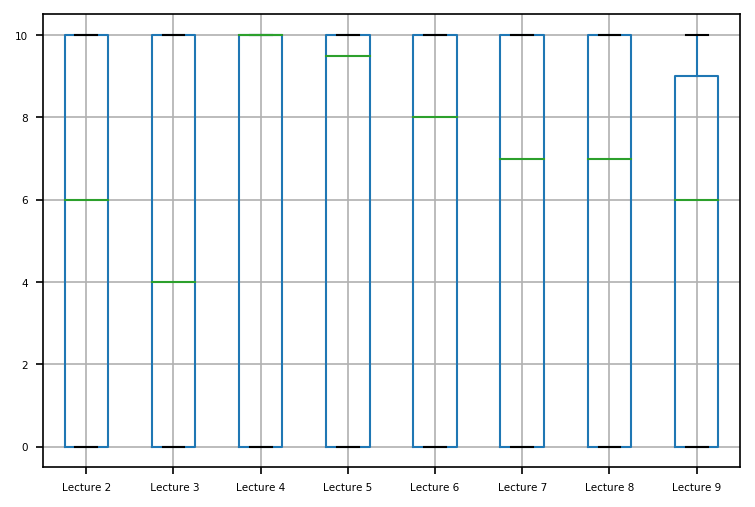

In [127]:
result_or_108_a.boxplot(fontsize = 5)
plt.show()

In [5]:
result_dsap_107 = pd.read_csv('D:\python statistic\data\DSAP107 grades.csv')
result_dsap_107

,student_id,Section,Homework 0 (1554),Homework 1 (1475),Homework 2 (1750),Homework 3 (1808),Homework 4 (1859),Homework 5 (1954),Homework 6 (2053),Homework 7 (2129),Homework8 (2232),Quiz (1582),Midterm (2042),Final (2346)
0,Points Possible,NaN,100,100,100,100,100,100,100,100,100,100.0,0,100.0
1,64,107-2 資料結構與進階程式設計,0,0,0,0,0,0,0,0,0,NaN,0,0.0
2,65,107-2 資料結構與進階程式設計,14,0,0,0,0,0,0,0,0,NaN,0,0.0
3,66,107-2 資料結構與進階程式設計,88,39,96,104,69,98,54,54,96,NaN,82,76.0
4,67,107-2 資料結構與進階程式設計,99,95,46,92,32,42,53,97,97,NaN,79,79.0
5,68,107-2 資料結構與進階程式設計,33,38,40,95,57,85,57,95,97,NaN,52,57.0
6,69,107-2 資料結構與進階程式設計,45,54,22,8,0,0,0,0,0,NaN,0,0.0
7,70,107-2 資料結構與進階程式設計,80,98,99,92,107,98,89,94,98,NaN,71,80.5
8,71,107-2 資料結構與進階程式設計,100,99,99,112,115,98,115,97,96,NaN,98,91.5
9,72,107-2 資料結構與進階程式設計,99,90,100,89,110,98,70,92,97,NaN,81,82.5


In [6]:
result_dsap_107_a = result_dsap_107.iloc[:,2:11
                                        
                                         ]
result_dsap_107_a

,Homework 0 (1554),Homework 1 (1475),Homework 2 (1750),Homework 3 (1808),Homework 4 (1859),Homework 5 (1954),Homework 6 (2053),Homework 7 (2129),Homework8 (2232)
0,100,100,100,100,100,100,100,100,100
1,0,0,0,0,0,0,0,0,0
2,14,0,0,0,0,0,0,0,0
3,88,39,96,104,69,98,54,54,96
4,99,95,46,92,32,42,53,97,97
5,33,38,40,95,57,85,57,95,97
6,45,54,22,8,0,0,0,0,0
7,80,98,99,92,107,98,89,94,98
8,100,99,99,112,115,98,115,97,96
9,99,90,100,89,110,98,70,92,97


###  DSAP 107 weekly result (boxplot)

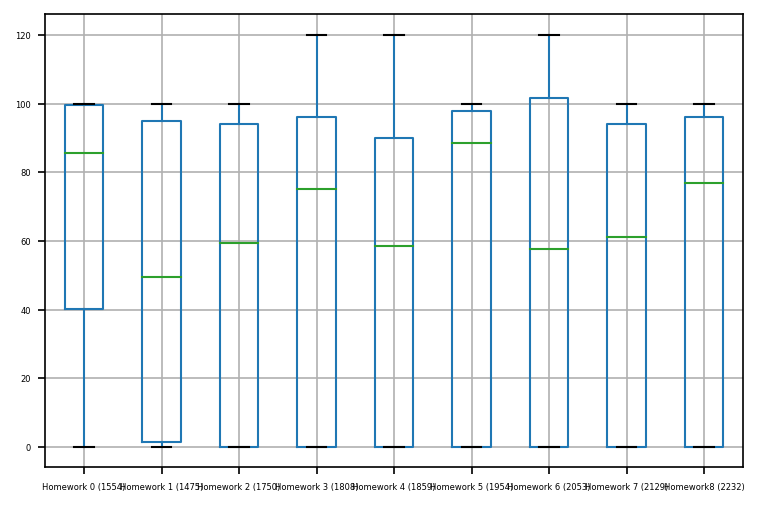

In [14]:
result_dsap_107_a.boxplot(fontsize = 4)
plt.show()